In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/hiraeth/Desktop/Online.Retail.csv")

# Show the first few rows to understand the structure
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the number of missing values per column
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Fill missing values in Description with "No Description"
df['Description'] = df['Description'].fillna('No Description')

# Fill missing CustomerID with a placeholder
df['CustomerID'] = df['CustomerID'].fillna(0)  # Or any other value

# Show the updated dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Check again for missing values in the dataset
missing_values_after = df.isnull().sum()

# Print the number of missing values per column to confirm it's settled
print(missing_values_after)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [10]:
# Calculate total amount for each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Show the updated dataset with TotalAmount
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [12]:
# Sum the TotalAmount column to get total revenue
total_revenue = df['TotalAmount'].sum()
print(f"Total Revenue: £{total_revenue}")

Total Revenue: £9747747.933999998


In [14]:
# Group by product description and sum total sales
top_selling_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False)

# Show the top 10 selling products
print(top_selling_products.head(10))

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalAmount, dtype: float64


Matplotlib is building the font cache; this may take a moment.


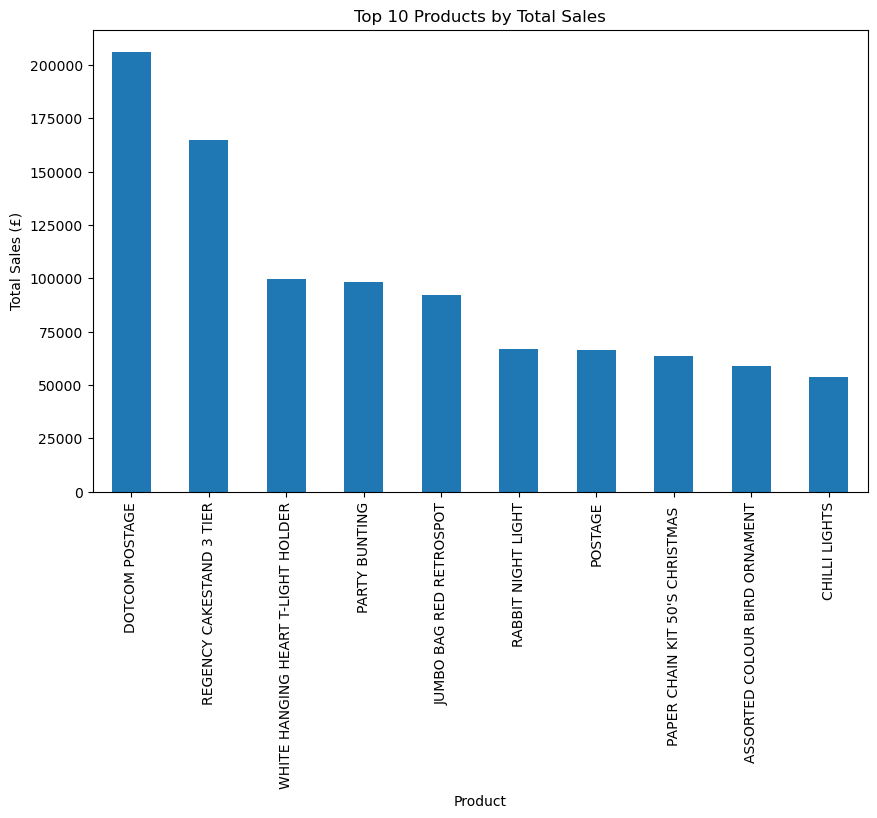

In [16]:
import matplotlib.pyplot as plt

# Plot the top 10 selling products
top_selling_products.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Sales (£)')
plt.xlabel('Product')
plt.show()

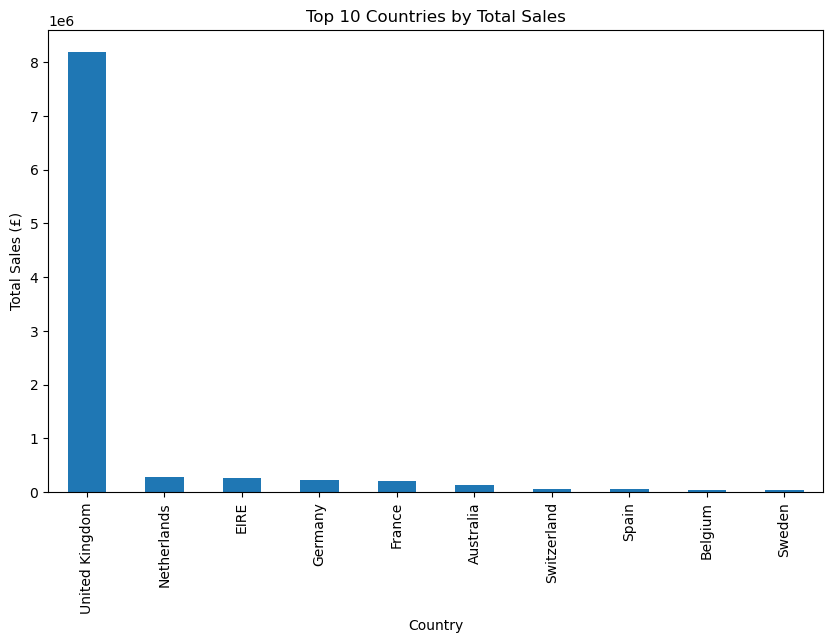

In [18]:
# Group by Country and sum the TotalAmount
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

# Plot sales by country
country_sales.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Total Sales')
plt.ylabel('Total Sales (£)')
plt.xlabel('Country')
plt.show()
